In [1]:
# #-*- coding:utf-8 -*-
# 2_3 政府性基金收入预测模型
from __future__ import print_function
import pandas as pd
import numpy as np
from GM11 import GM11 # 引入自己编的灰色预测函数

x0 = np.array([3152063,2213050, 4050122, 5265142, 5556619, 4772843, 9463330])
f, a, b, x00, C, P = GM11(x0)
print (u'2014、2015年的预测结果分别是：\n%0.2f万元和%0.2f万元' % (f(8), f(9)))
print (u'后验差比值为： %0.4f' % C)
print (u'小残差概率： %0.2f' % P)

if (C < 0.35 and P > 0.95): # 评测后验差判别
    print ('该模型精度为---好' )
elif (C < 0.5 and P > 0.8):
    print ('该模型精度为---合格' )
elif (C < 0.65 and P > 0.7):
    print ('该模型精度为---勉强合格')
else:
    print ('该模型精度为---不合格' )
    
p = pd.DataFrame(x0, columns = ['y'], index = range(2007,2014))
p.loc[2014] = None
p.loc[2015] = None
p['y_pred'] = [f(i) for i in range(1,10)]
p['y_pred'] = p['y_pred'].round(2)
p.index = pd.to_datetime(p.index, format='%Y')

p


2014、2015年的预测结果分别是：
10387002.56万元和12929795.07万元
后验差比值为： 0.2390
小残差概率： 1.00
该模型精度为---好


,y,y_pred
2007-01-01,3152063.0,2242747.69
2008-01-01,2213050.0,2791784.04
2009-01-01,4050122.0,3475227.37
2010-01-01,5265142.0,4325981.19
2011-01-01,5556619.0,5385003.99
2012-01-01,4772843.0,6703281.11
2013-01-01,9463330.0,8344279.36
2014-01-01,NaN,10387002.56
2015-01-01,NaN,12929795.07


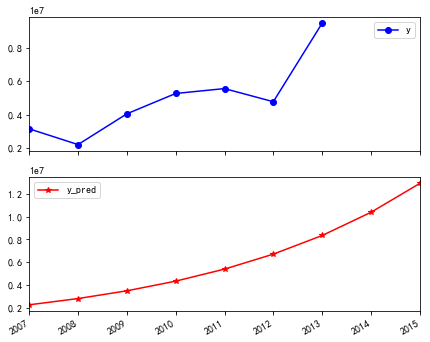

In [11]:
import matplotlib.pyplot as plt # 画出预测结果图
plt.rc('figure',figsize=(7,6))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']= False

# plt.title(u'灰色预测政府性基金收入真是值和预测值对比')
p1 = p[['y','y_pred']].plot(subplots = True, style=['b-o', 'r-*'])
# plt.xlabel(u'年份')
# plt.ylabel(u'收入')
plt.savefig('zhengfujijin.jpg')
plt.show()

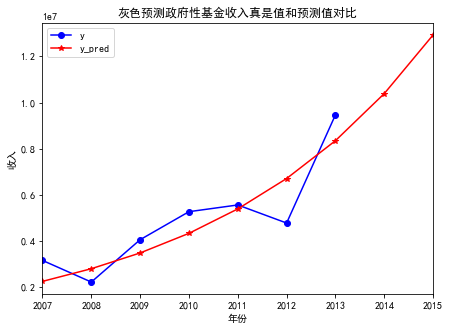

In [5]:
p.plot(xticks = p.index, style=['b-o', 'r-*'])
plt.title(u'灰色预测政府性基金收入真是值和预测值对比')
plt.xlabel(u'年份')
plt.ylabel(u'收入')
plt.savefig('zhengfujijin2.jpg')
plt.show()